In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fmnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2311 - accuracy: 0.9132
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2249 - accuracy: 0.9164
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2179 - accuracy: 0.9177
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2101 - accuracy: 0.9206
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2044 - accuracy: 0.9234
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1990 - accuracy: 0.9265
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1927 - accuracy: 0.9289
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1873 - accuracy: 0.9291
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1839 - accuracy: 0.9305
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.179

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 89.0291 - accuracy: 0.8570


[89.02910614013672, 0.8569999933242798]

LABEL: 5

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.         0.64313725 0.19607843 0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.

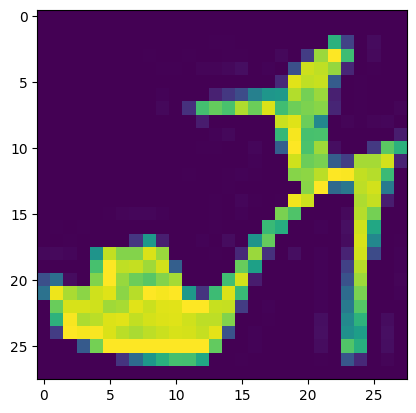

In [18]:
import numpy as np
import matplotlib.pyplot as plt

index = 9

np.set_printoptions(linewidth=320)

print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

plt.imshow(x_train[index])

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [20]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9417
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1551 - accuracy: 0.9417
